In [1]:


import pandas as pd
import matplotlib.pyplot as plt

In [2]:


MLBAM18 = pd.read_csv("C:/Users/abren/Downloads/MLBAM18.csv")
MLBAM18.drop(['Unnamed: 0'], axis=1, inplace=True)
pd.set_option('display.max_columns', 100)
display(MLBAM18)

,inning,batterId,pitcherId,event,x,y,ab_num,timestamp,stand,throws,runnerMovement,half,balls,strikes,endOuts,actionId,description,game_type,home_team,home_teamId,home_lg,away_team,away_teamId,away_lg,venueId,stadium,field_teamId,playerId.1B,playerId.2B,playerId.3B,playerId.C,playerId.CF,playerId.LF,playerId.RF,playerId.SS,batterPos,batterName,pitcherName,runsOnPlay,startOuts,runsInInning,runsITD,runsFuture,start1B,start2B,start3B,end1B,end2B,end3B,outsInInning,startCode,endCode,fielderId,gameId,isPA,isAB,isHit,isBIP,our.x,our.y,r,theta
0,1,664023,570632,Home Run,233.22,70.48,1,2018-03-29 16:43:11,L,R,[664023:::T:Home Run],top,0,0,0,NaN,Ian Happ homers (1) on a fly ball to right fie...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,CF,"Happ, I",Urena,1,0,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,True,False,270.081515,320.743636,419.309557,0.870937
1,1,592178,570632,Walk,NaN,NaN,2,2018-03-29 16:43:56,R,R,[592178::1B::Walk],top,4,2,0,NaN,Kris Bryant walks.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,3B,Bryant,Urena,0,0,3,1,2,NaN,NaN,NaN,592178.0,NaN,NaN,3,0,1,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
2,1,519203,570632,Hit By Pitch,NaN,NaN,3,2018-03-29 16:46:24,L,R,[592178:1B:2B::Hit By Pitch][519203::1B::Hit B...,top,1,2,0,NaN,Anthony Rizzo hit by pitch. Kris Bryant to ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,1B,Rizzo,Urena,0,0,3,1,2,592178.0,NaN,NaN,519203.0,592178.0,NaN,3,1,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
3,1,575929,570632,Strikeout,NaN,NaN,4,2018-03-29 16:48:44,R,R,NaN,top,2,3,1,NaN,Willson Contreras strikes out swinging.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,C,Contreras,Urena,0,0,3,1,2,519203.0,592178.0,NaN,519203.0,592178.0,NaN,3,3,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,False,NaN,NaN,NaN,NaN
4,1,656941,570632,Groundout,148.05,164.76,5,2018-03-29 16:52:10,L,R,[519203:1B:2B::Groundout][592178:2B:3B::Ground...,top,2,2,2,NaN,"Kyle Schwarber grounds out, first baseman Just...",R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,LF,Schwarber,Urena,0,1,3,1,2,519203.0,592178.0,NaN,NaN,519203.0,592178.0,3,3,6,571506.0,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,True,57.525216,85.451775,103.010467,0.978292
5,1,608365,570632,Hit By Pitch,NaN,NaN,6,2018-03-29 16:54:56,R,R,[608365::1B::Hit By Pitch],top,1,1,2,NaN,Addison Russell hit by pitch.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,SS,Russell,Urena,0,2,3,1,2,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,3,6,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
6,1,518792,570632,Walk,NaN,NaN,7,2018-03-29 16:56:54,L,R,[608365:1B:2B::Walk][519203:2B:3B::Walk][59217...,top,4,0,2,NaN,Jason Heyward walks. Kris Bryant scores. ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,RF,Heyward,Urena,1,2,3,1,2,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,3,7,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
7,1,595879,570632,Hit By Pitch,NaN,NaN,8,2018-03-29 16:59:56,R,R,[518792:1B:2B::Hit By Pitch][608365:2B:3B::Hit...,top,0,0,2,NaN,Javier Baez hit by pitch. Anthony Rizzo sco...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,2B,"Baez, J",Urena,1,2,3,2,1,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,3,7,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
8,1,452657,570632,Groundout,143.81,152.04,9,2018-03-29 17:01:12,L,R,[595879:1B:::Groundout][518792:2B:::Groundout]...,top,2,2,3,NaN,"Jon Lester grounds out, second baseman Star

In [3]:


print(MLBAM18.columns.tolist())

['inning', 'batterId', 'pitcherId', 'event', 'x', 'y', 'ab_num', 'timestamp', 'stand', 'throws', 'runnerMovement', 'half', 'balls', 'strikes', 'endOuts', 'actionId', 'description', 'game_type', 'home_team', 'home_teamId', 'home_lg', 'away_team', 'away_teamId', 'away_lg', 'venueId', 'stadium', 'field_teamId', 'playerId.1B', 'playerId.2B', 'playerId.3B', 'playerId.C', 'playerId.CF', 'playerId.LF', 'playerId.RF', 'playerId.SS', 'batterPos', 'batterName', 'pitcherName', 'runsOnPlay', 'startOuts', 'runsInInning', 'runsITD', 'runsFuture', 'start1B', 'start2B', 'start3B', 'end1B', 'end2B', 'end3B', 'outsInInning', 'startCode', 'endCode', 'fielderId', 'gameId', 'isPA', 'isAB', 'isHit', 'isBIP', 'our.x', 'our.y', 'r', 'theta']


So we now restrict the data to a manageable set of variables. Note that the data contains co-ordinates 'x' and 'y' as well as 'our.x' and 'our.y' The difference here is the point of view: 'x' and'y' are looking toward the batter from the bleachers, 'our.x' and 'our.y' are looking from behind the batter. We'll adopt the more conventional view by using 'our.x' and 'our.y'.

In [4]:


MLBmap = MLBAM18[['gameId','home_team','away_team','stadium','inning', 'batterId', 'batterName',\
                  'pitcherId', 'pitcherName','event','timestamp','stand', 'throws','x','y','our.x','our.y']]
MLBmap

,gameId,home_team,away_team,stadium,inning,batterId,batterName,pitcherId,pitcherName,event,timestamp,stand,throws,x,y,our.x,our.y
0,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,664023,"Happ, I",570632,Urena,Home Run,2018-03-29 16:43:11,L,R,233.22,70.48,270.081515,320.743636
1,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,592178,Bryant,570632,Urena,Walk,2018-03-29 16:43:56,R,R,NaN,NaN,NaN,NaN
2,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,519203,Rizzo,570632,Urena,Hit By Pitch,2018-03-29 16:46:24,L,R,NaN,NaN,NaN,NaN
3,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,575929,Contreras,570632,Urena,Strikeout,2018-03-29 16:48:44,R,R,NaN,NaN,NaN,NaN
4,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,656941,Schwarber,570632,Urena,Groundout,2018-03-29 16:52:10,L,R,148.05,164.76,57.525216,85.451775
5,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,608365,Russell,570632,Urena,Hit By Pitch,2018-03-29 16:54:56,R,R,NaN,NaN,NaN,NaN
6,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,518792,Heyward,570632,Urena,Walk,2018-03-29 16:56:54,L,R,NaN,NaN,NaN,NaN
7,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,595879,"Baez, J",570632,Urena,Hit By Pitch,2018-03-29 16:59:56,R,R,NaN,NaN,NaN,NaN
8,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,452657,Lester,570632,Urena,Groundout,2018-03-29 17:01:12,L,R,143.81,152.04,46.943571,117.196710
9,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,621446,Brinson,452657,Lester,Groundout,2018-03-29 17:06:02,R,L,106.86,151.43,-45.271472,118.719069


In [5]:
MLBmap['event'].unique()

array(['Home Run', 'Walk', 'Hit By Pitch', 'Strikeout', 'Groundout',
       'Single', 'Forceout', 'Lineout', 'Pop Out', 'Double',
       'Intent Walk', 'Grounded Into DP', 'Triple', 'Flyout',
       'Catcher Interference', 'Field Error', 'Sac Bunt', 'Sac Fly',
       'Double Play', 'Fielders Choice Out', 'Runner Out',
       'Strikeout - DP', 'Bunt Groundout', 'Fielders Choice',
       'Bunt Pop Out', 'Batter Interference', 'Bunt Lineout',
       'Fan interference', 'Triple Play', 'Sac Fly DP',
       'Sacrifice Bunt DP'], dtype=object)

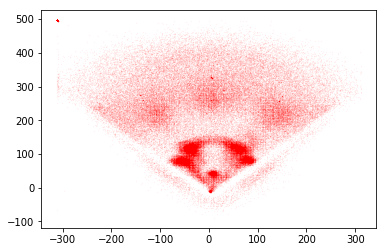

In [6]:
plt.scatter(MLBmap['our.x'],MLBmap['our.y'], s=.001,c='r', marker= '.')

## Plotting hits



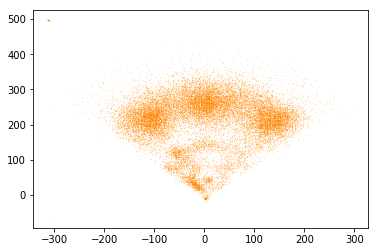

In [7]:
# singles

Single = MLBmap[MLBmap.event == 'Single']
plt.scatter(Single['our.x'],Single['our.y'], s=.02,c='darkorange', marker= '.')

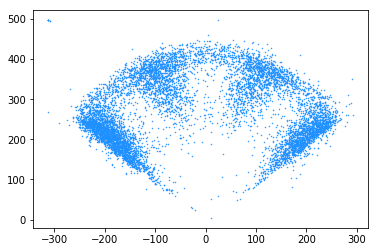

In [8]:
#doubles

Double = MLBmap[MLBmap.event == 'Double']
plt.scatter(Double['our.x'],Double['our.y'], s=1,c='dodgerblue', marker= '.')

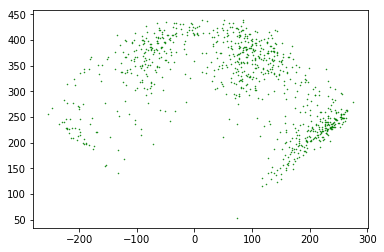

In [9]:
#triples

Triple = MLBmap[MLBmap.event == 'Triple']
plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='g', marker= '.')

(0, 500)

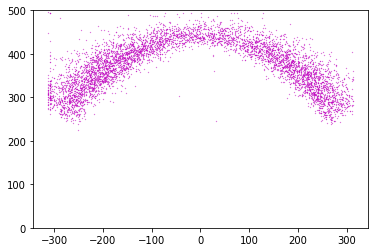

In [10]:
#home runs

Homer = MLBmap[MLBmap.event == 'Home Run']
plt.scatter(Homer['our.x'],Homer['our.y'], s=.20,c='m', marker= '.')
#ax.set(xlim=(-300,300), ylim=(0,450))
plt.ylim((0,500))

(0, 500)

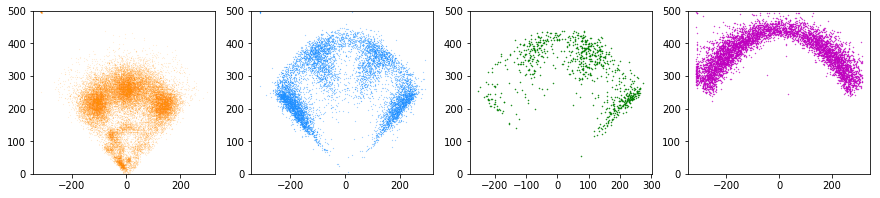

In [11]:
# four plots: Singles, doubles, triples and home runs

f = plt.figure(figsize=(15,3))
ax = f.add_subplot(141)
ax=plt.scatter(Single['our.x'],Single['our.y'], s=.01,c='darkorange', marker= '.')
plt.ylim((0,500))
ax = f.add_subplot(142)
ax=plt.scatter(Double['our.x'],Double['our.y'], s=.1,c='dodgerblue', marker= '.')
plt.ylim((0,500))
ax = f.add_subplot(143)
ax = plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='g', marker= '.')
plt.ylim((0,500))
ax = f.add_subplot(144)
ax = plt.scatter(Homer['our.x'],Homer['our.y'], s=.5,c='m', marker= '.')
plt.ylim((0,500))

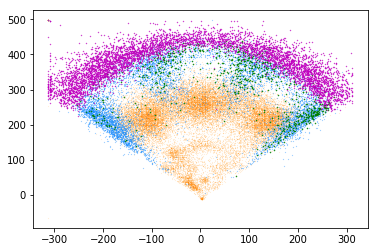

In [12]:
#the four types of hit on one plot 

ax=plt.scatter(Single['our.x'],Single['our.y'], s=.01,c='darkorange', marker= '.')
ax=plt.scatter(Double['our.x'],Double['our.y'], s=.1,c='dodgerblue', marker= '.')
ax = plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='g', marker= '.')
ax = plt.scatter(Homer['our.x'],Homer['our.y'], s=.5,c='m', marker= '.')

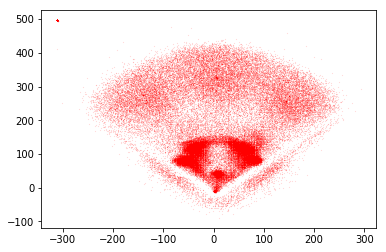

In [13]:
# Outs
Outs = MLBmap[(MLBmap.event == 'Groundout')|(MLBmap.event == 'Flyout')| (MLBmap.event == 'Pop Out')|
             (MLBmap.event == 'Forceout')|(MLBmap.event == 'Lineout')| (MLBmap.event == 'Grounded Into DP')]
plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')

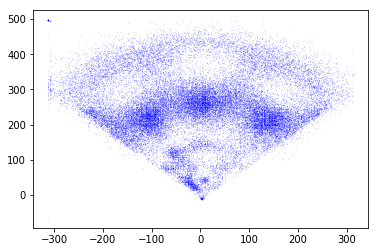

In [14]:
# Hits
Hits = MLBmap[(MLBmap.event == 'Single')|(MLBmap.event == 'Double')| (MLBmap.event == 'Triple')|
             (MLBmap.event == 'Home Run')]
plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')

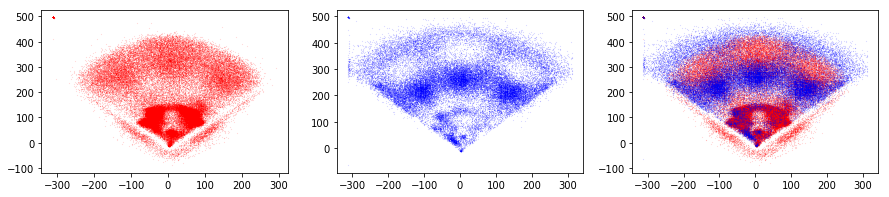

In [15]:
# Hits vs. Outs
f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
ax2 = f.add_subplot(132)
ax2 = plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')
ax3 = f.add_subplot(133)
ax3=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
ax3=plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')

In [16]:
# list of stadiums

stadiums = MLBmap.groupby('stadium')['gameId'].count().reset_index()
stadiums

,stadium,gameId
0,AT&T Park,6172
1,Angel Stadium,3202
2,Angel Stadium of Anaheim,2878
3,BB&T Ballpark,75
4,Busch Stadium,6195
5,Chase Field,6229
6,Citi Field,6046
7,Citizens Bank Park,6069
8,Comerica Park,6095
9,Coors Field,6237


Tropicana Field is said to be the smallest ballpark and Dodger Stadium the largest ballpark - so let's compare the heatmaps.

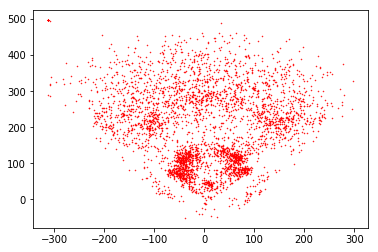

In [17]:
# Tropicana Field

Trop = MLBmap[MLBmap.stadium == 'Tropicana Field']
plt.scatter(Trop['our.x'],Trop['our.y'], s=1,c='r', marker= '.')

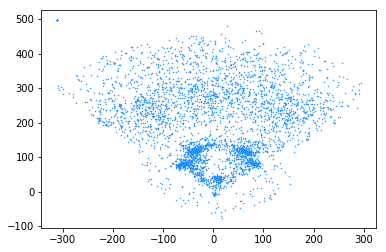

In [18]:
# Dodger Stadium 

Dodge = MLBmap[MLBmap.stadium == 'Dodger Stadium']
plt.scatter(Dodge['our.x'],Dodge['our.y'], s=1,c='dodgerblue', marker= '.')

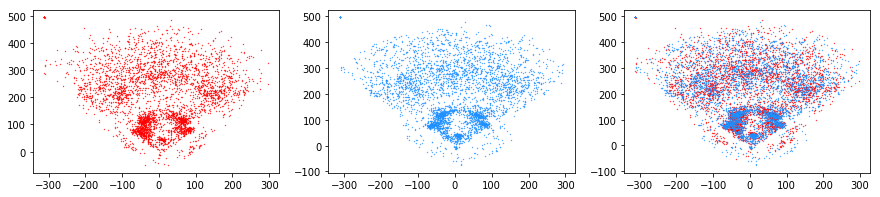

In [19]:
# Tropicana Field and Dodger Stadium


f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(Trop['our.x'],Trop['our.y'], s=.5,c='r', marker= '.')
ax2 = f.add_subplot(132)
ax2=plt.scatter(Dodge['our.x'],Dodge['our.y'], s=.5,c='dodgerblue', marker= '.')
ax3 = f.add_subplot(133)
ax3 = plt.scatter(Trop['our.x'],Trop['our.y'], s=.5,c='r', marker= '.')
ax3 = plt.scatter(Dodge['our.x'],Dodge['our.y'], s=.5,c='dodgerblue', marker= '.')

In [20]:
#  Comparing players



playersn = MLBmap.groupby('batterId')['batterName'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,batterId,count,unique,top,freq
696,607208,748,1,Turner,748
596,596019,747,1,Lindor,747
276,519317,714,1,Stanton,714
101,455976,710,1,Markakis,710
540,593160,709,1,Merrifield,709
236,514917,709,1,"Hernandez, C",709
510,592518,709,1,Machado,709
254,518692,707,2,Freeman,518
718,608324,707,1,Bregman,707
378,547180,705,1,Harper,705


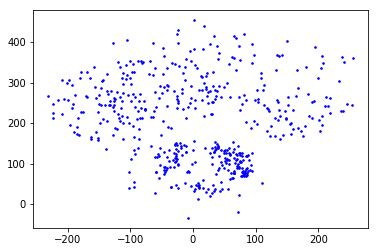

In [22]:
# Markakis (L)

b455976 = MLBmap[MLBmap.batterId == 455976]
plt.scatter(b455976['our.x'],b455976['our.y'], s=10,c='b', marker= '.')

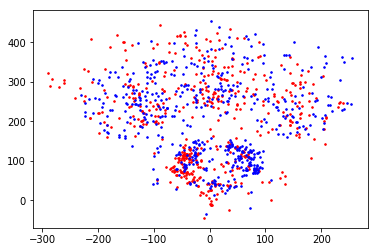

In [23]:
# Turner and Markakis together

plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='r', marker= '.')
plt.scatter(b455976['our.x'],b455976['our.y'], s=10,c='b', marker= '.')


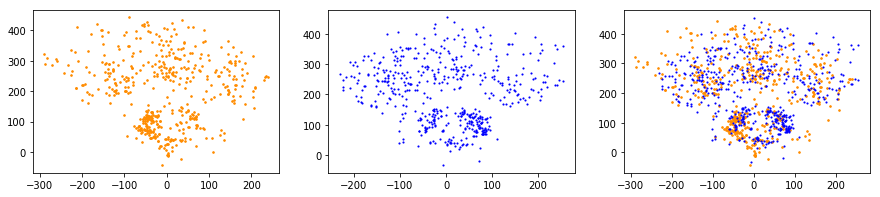

In [24]:
# Turner and Markakis in three plots

f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='darkorange', marker= '.')
ax2 = f.add_subplot(132)
ax2=plt.scatter(b455976['our.x'],b455976['our.y'], s=5,c='b', marker= '.')
ax3 = f.add_subplot(133)
ax3 = plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='darkorange', marker= '.')
ax3 = plt.scatter(b455976['our.x'],b455976['our.y'], s=5,c='b', marker= '.')